## Dublin Bike Pre Processing data 

In [1]:
#import necessary libraries and files 
import pandas as pd
import numpy as np
import warnings
import time
import datetime as dt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


%matplotlib inline

In [4]:
import os
import glob
from pathlib import Path

In [6]:
home = str(Path.home())

os.getcwd()
old_dir = os.getcwd()
print(os.getcwd())


C:\Users\imeld
C:\Users\imeld\work\ML_CSP\ML-Project


In [24]:
# constant value switches
MAKE_FILES=True
READ_FILES = False
FILE_MASK = "dublinbikes*.csv"
#FILE_MASK = "dublinbikes_2021*.csv"

In [25]:
os.chdir(old_dir)
# dublinbikes folder only has dublinbikes*.csv files
#path = r"dublinbikes/"
#os.chdir(path)
folder_path = 'dublinbikes/'
file_list = glob.glob(folder_path + FILE_MASK)

print(file_list)
full_data = pd.DataFrame(pd.read_csv(file_list[0]))

for i in range(1, len(file_list)):
    data = pd.read_csv(file_list[i])
    #print(data.head())
    df = pd.DataFrame(data)
    full_data = pd.concat([full_data, df])
print(full_data.sample(3))

#https://www.geeksforgeeks.org/how-to-read-multiple-data-files-into-pandas/
#https://realpython.com/read-write-files-python/#text-file-types

#os.chdir(old_dir)

['dublinbikes\\dublinbikes_20180701_20181001.csv', 'dublinbikes\\dublinbikes_20181001_20190101.csv', 'dublinbikes\\dublinbikes_20190101_20190401.csv', 'dublinbikes\\dublinbikes_20190401_20190701.csv', 'dublinbikes\\dublinbikes_20190701_20191001.csv', 'dublinbikes\\dublinbikes_20191001_20200101.csv', 'dublinbikes\\dublinbikes_20200101_20200401.csv', 'dublinbikes\\dublinbikes_20200401_20200701.csv', 'dublinbikes\\dublinbikes_20200701_20201001.csv', 'dublinbikes\\dublinbikes_20201001_20210101.csv', 'dublinbikes\\dublinbikes_20210101_20210401.csv', 'dublinbikes\\dublinbikes_20210401_20210701.csv', 'dublinbikes\\dublinbikes_20210701_20211001.csv', 'dublinbikes\\dublinbikes_20211001_20220101.csv']


In [26]:
#print(full_data.sample(3))


         STATION ID                 TIME         LAST UPDATED  \
2227209          47  2020-06-10 05:05:02  2020-06-10 05:01:14   
1380164           3  2019-08-13 06:25:03  2019-08-13 06:24:35   
2366489          81  2018-12-12 01:20:01  2018-12-12 01:13:06   

                                 NAME  BIKE STANDS  AVAILABLE BIKE STANDS  \
2227209                HERBERT STREET           40                     34   
1380164                 BOLTON STREET           20                     20   
2366489  ST. JAMES HOSPITAL (CENTRAL)           40                     24   

         AVAILABLE BIKES STATUS                       ADDRESS   LATITUDE  \
2227209                6   Open                Herbert Street  53.335743   
1380164                0   Open                 Bolton Street  53.351181   
2366489               16   Open  St. James Hospital (Central)  53.339985   

         LONGITUDE  
2227209  -6.245510  
1380164  -6.269859  
2366489  -6.295594  


In [27]:
# write out full data to csv file
if MAKE_FILES : full_data.to_csv("data/full_data.csv")
if READ_FILES : full_data = pd.read_csv("data/full_data.csv")


In [28]:
print((full_data['NAME']).unique())

['CLARENDON ROW' 'BLESSINGTON STREET' 'BOLTON STREET' 'GREEK STREET'
 'CHARLEMONT PLACE' 'CHRISTCHURCH PLACE' 'HIGH STREET' 'CUSTOM HOUSE QUAY'
 'EXCHEQUER STREET' 'DAME STREET' 'EARLSFORT TERRACE' 'ECCLES STREET'
 'FITZWILLIAM SQUARE WEST' 'FOWNES STREET UPPER' 'HARDWICKE STREET'
 'GEORGES QUAY' 'GOLDEN LANE' 'GRANTHAM STREET' 'HERBERT PLACE'
 'LEINSTER STREET SOUTH' 'TOWNSEND STREET' 'CUSTOM HOUSE'
 'CATHAL BRUGHA STREET' 'MERRION SQUARE EAST' 'MERRION SQUARE WEST'
 'MOLESWORTH STREET' 'MOUNTJOY SQUARE WEST' 'ORMOND QUAY UPPER'
 'PARNELL SQUARE NORTH' 'PARNELL STREET' 'PEARSE STREET'
 "PRINCES STREET / O'CONNELL STREET" 'PORTOBELLO HARBOUR' 'SMITHFIELD'
 "ST. STEPHEN'S GREEN EAST" "ST. STEPHEN'S GREEN SOUTH" 'TALBOT STREET'
 'WILTON TERRACE' 'JERVIS STREET' 'HARCOURT TERRACE' 'SMITHFIELD NORTH'
 'PORTOBELLO ROAD' 'UPPER SHERRARD STREET' 'DEVERELL PLACE'
 'STRAND STREET GREAT' 'HERBERT STREET' 'EXCISE WALK' 'GUILD STREET'
 'GEORGES LANE' 'YORK STREET WEST' 'YORK STREET EAST' 'NEWMAN H

In [31]:
full_data['usage'] = full_data['AVAILABLE BIKES'].diff()
full_data.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,usage
0,1,2018-08-01 12:30:02,2018-08-01 12:26:05,CLARENDON ROW,31,1,30,Open,Clarendon Row,53.340927,-6.262501,NaN
1,1,2018-08-01 12:35:02,2018-08-01 12:33:03,CLARENDON ROW,31,2,29,Open,Clarendon Row,53.340927,-6.262501,-1.0
2,1,2018-08-01 12:40:02,2018-08-01 12:33:03,CLARENDON ROW,31,2,29,Open,Clarendon Row,53.340927,-6.262501,0.0
3,1,2018-08-01 12:45:02,2018-08-01 12:43:12,CLARENDON ROW,31,2,29,Open,Clarendon Row,53.340927,-6.262501,0.0
4,1,2018-08-01 12:50:02,2018-08-01 12:44:37,CLARENDON ROW,31,3,28,Open,Clarendon Row,53.340927,-6.262501,-1.0


In [8]:
#cluster stations
data = full_data
data = data[data['STATUS'] == 'Open']
data = data[(data['LAST UPDATED'] >= '2019-07-01') & (data['LAST UPDATED'] < '2020-04-01')]
data = data[(data['LAST UPDATED'] < '2019-12-01') | (data['LAST UPDATED'] >= '2020-02-01')]

#remove rows where no update actually occurs
data = data.drop(['TIME'], axis = 1)
data.drop_duplicates(keep= 'first',inplace=True)


#get date and time columns
data['DATETIME'] = [dt.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in data["LAST UPDATED"]]
data['LAST UPDATED'] = [dt.datetime.time(d) for d in data['DATETIME']] 
data['DATE'] = [dt.datetime.date(d) for d in data['DATETIME']] 
data['date_for_merge'] = data['DATETIME'].dt.round('H')

#create important features
data['OCCUPANCY_PCT'] =  data['AVAILABLE BIKES'] / data['BIKE STANDS']
data['FULL'] = np.where(data['OCCUPANCY_PCT'] == 0, 1,0 )
data['EMPTY'] = np.where(data['OCCUPANCY_PCT'] == 1, 1,0 )

### create time aggregates needed for clustering
# weekday/saturday/sunday
data['DAY_NUMBER'] = data.DATETIME.dt.dayofweek
data['DAY_TYPE'] = np.where(data['DAY_NUMBER'] <= 4, 'Weekday', (np.where(data['DAY_NUMBER'] == 5, 'Saturday', 'Sunday')))

def bin_time(x):
    if x.time() < dt.time(6):
        return "Overnight "
    elif x.time() < dt.time(11):
        return "6AM-10AM "
    elif x.time() < dt.time(16):
        return "11AM-3PM "
    elif x.time() < dt.time(20):
        return "4PM-7PM "
    elif x.time() <= dt.time(23):
        return "8PM-11PM "
    else:
        return "Overnight "


data["TIME_TYPE"] = data['DATETIME'].apply(bin_time)
data['HOUR'] = data['DATETIME'].dt.hour
data['MONTH'] = data['DATETIME'].dt.month
data['CLUSTER_GROUP'] = data['TIME_TYPE'] + data['DAY_TYPE']

data.sample(5)

,Unnamed: 0,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,...,date_for_merge,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,DAY_TYPE,TIME_TYPE,HOUR,MONTH,CLUSTER_GROUP
10258588,1751149,116,22:17:12,BROADSTONE,30,15,15,Open,Broadstone,53.354698,...,2021-11-28 22:00:00,0.500000,0,0,6,Sunday,8PM-11PM,22,11,8PM-11PM Sunday
3327090,562404,111,01:23:37,MOUNTJOY SQUARE EAST,40,31,9,Open,Mountjoy Square East,53.356716,...,2021-04-18 01:00:00,0.225000,0,0,6,Sunday,Overnight,1,4,Overnight Sunday
1999687,1999687,78,20:05:11,MATER HOSPITAL,40,19,21,Open,Mater Hospital,53.359966,...,2021-03-08 20:00:00,0.525000,0,0,0,Weekday,8PM-11PM,20,3,8PM-11PM Weekday
1432672,1432672,18,05:31:19,GRANTHAM STREET,30,16,14,Open,Grantham Street,53.334122,...,2021-02-17 06:00:00,0.466667,0,0,2,Weekday,Overnight,5,2,Overnight Weekday
1387205,1387205,73,03:04:47,FRANCIS STREET,30,3,27,Open,Francis Street,53.342079,...,2021-02-15 03:00:00,0.900000,0,0,0,Weekday,Overnight,3,2,Overnight Weekday


In [9]:
#Selecting the stations 
#selected_stations = [68,78,83,85,88,97]

In [10]:
data.describe()
data.head()

,Unnamed: 0,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,...,date_for_merge,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,DAY_TYPE,TIME_TYPE,HOUR,MONTH,CLUSTER_GROUP
0,0,2,23:57:30,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,...,2021-01-01,0.05,0,0,3,Weekday,Overnight,23,12,Overnight Weekday
1,1,2,23:57:30,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,...,2021-01-01,0.05,0,0,3,Weekday,Overnight,23,12,Overnight Weekday
2,2,2,00:07:39,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,...,2021-01-01,0.05,0,0,4,Weekday,Overnight,0,1,Overnight Weekday
3,3,2,00:07:39,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,...,2021-01-01,0.05,0,0,4,Weekday,Overnight,0,1,Overnight Weekday
4,4,2,00:17:47,BLESSINGTON STREET,20,19,1,Open,Blessington Street,53.35677,...,2021-01-01,0.05,0,0,4,Weekday,Overnight,0,1,Overnight Weekday


### Time cluster 

In [11]:
#group data into clusters
clustering_df = data[['STATION ID', 'NAME', 'LATITUDE', 'LONGITUDE', 'DAY_TYPE', 'TIME_TYPE', 'OCCUPANCY_PCT','CLUSTER_GROUP']]
clustering_df = clustering_df.groupby(['STATION ID', 'NAME', 'LATITUDE', 'LONGITUDE', 'CLUSTER_GROUP'],as_index=False)['OCCUPANCY_PCT'].mean()
clustering_df  = clustering_df.set_index('STATION ID')

#pivot dataframe for clustering
clustering_df = clustering_df.pivot_table(index= ['NAME', 'STATION ID','LATITUDE', 'LONGITUDE'] , columns=['CLUSTER_GROUP'], values='OCCUPANCY_PCT')
clustering_df  = clustering_df.reset_index()
clustering_df  = clustering_df .set_index('NAME')
clustering_df = clustering_df.dropna()

clustering_df.sample(5)

CLUSTER_GROUP,STATION ID,LATITUDE,LONGITUDE,11AM-3PM Saturday,11AM-3PM Sunday,11AM-3PM Weekday,4PM-7PM Saturday,4PM-7PM Sunday,4PM-7PM Weekday,6AM-10AM Saturday,6AM-10AM Sunday,6AM-10AM Weekday,8PM-11PM Saturday,8PM-11PM Sunday,8PM-11PM Weekday,Overnight Saturday,Overnight Sunday,Overnight Weekday
NAME,,,,,,,,,,,,,,,,,,
MARKET STREET SOUTH,76,53.342297,-6.287661,0.334464,0.306352,0.368126,0.320578,0.277295,0.356577,0.335520,0.310886,0.315409,0.317306,0.288309,0.376424,0.370902,0.333695,0.390971
KILMAINHAM GAOL,97,53.342113,-6.310015,0.353347,0.358539,0.384651,0.358926,0.429193,0.509492,0.476386,0.387664,0.387606,0.380559,0.473542,0.622486,0.552395,0.429992,0.635080
NORTH CIRCULAR ROAD,60,53.359623,-6.260348,0.446041,0.303447,0.356659,0.392372,0.359474,0.509765,0.609293,0.365050,0.457348,0.392444,0.428436,0.686758,0.676014,0.449748,0.730344
TOWNSEND STREET,22,53.345921,-6.254614,0.551774,0.552903,0.440464,0.494589,0.484290,0.458066,0.513131,0.462048,0.467274,0.464778,0.421138,0.429691,0.433249,0.417155,0.400000
CHARLEVILLE ROAD,107,53.359158,-6.281866,0.299029,0.318778,0.343299,0.272377,0.334588,0.387057,0.311650,0.315560,0.301963,0.281988,0.353550,0.399888,0.349971,0.329055,0.429657


## K-means clustering analysis 

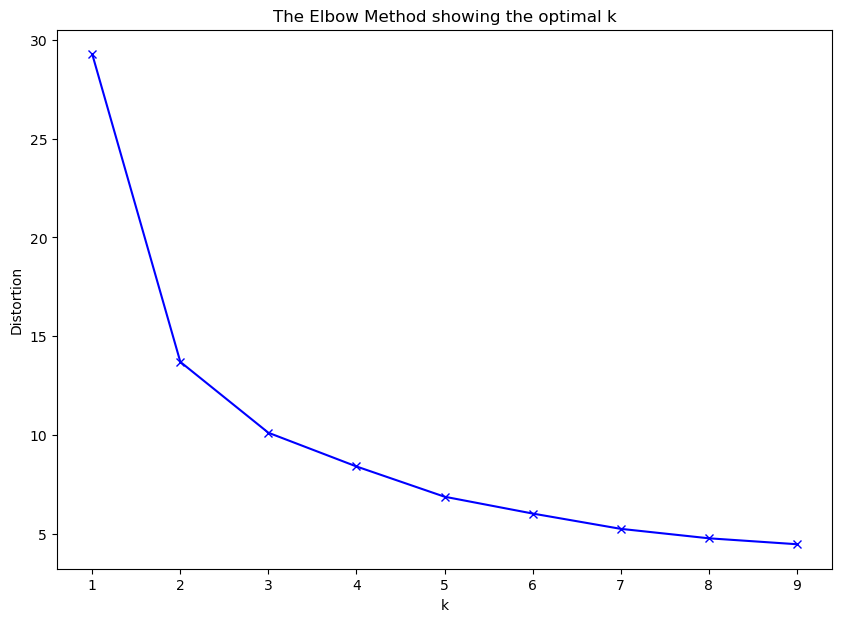

In [12]:
distortions = []
K = range(1,10)
X = np.array(clustering_df.drop(['STATION ID', 'LATITUDE', 'LONGITUDE'], 1).astype(float))
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [34]:
#clustering algo
X = np.array(clustering_df.drop(['STATION ID', 'LATITUDE', 'LONGITUDE'], 1).astype(float))
KM = KMeans(n_clusters=5) 
#KM = KMeans(n_clusters=3) 
KM.fit(X)
clusters = KM.predict(X)

locations = clustering_df
locations['Cluster'] = clusters
locations = locations.reset_index()
locations.head(5)

CLUSTER_GROUP,NAME,STATION ID,LATITUDE,LONGITUDE,11AM-3PM Saturday,11AM-3PM Sunday,11AM-3PM Weekday,4PM-7PM Saturday,4PM-7PM Sunday,4PM-7PM Weekday,6AM-10AM Saturday,6AM-10AM Sunday,6AM-10AM Weekday,8PM-11PM Saturday,8PM-11PM Sunday,8PM-11PM Weekday,Overnight Saturday,Overnight Sunday,Overnight Weekday,Cluster
0,AVONDALE ROAD,108,53.359406,-6.276142,0.278113,0.294698,0.307785,0.269566,0.271203,0.347006,0.316856,0.268773,0.278609,0.289457,0.299145,0.381716,0.372831,0.306346,0.399911,0
1,BENSON STREET,90,53.344154,-6.233451,0.175842,0.223499,0.358078,0.239944,0.284770,0.274678,0.207506,0.269740,0.351126,0.271069,0.325013,0.246672,0.230739,0.284623,0.243360,2
2,BLACKHALL PLACE,88,53.348801,-6.281637,0.437836,0.476926,0.377601,0.514850,0.520750,0.463503,0.538152,0.584612,0.485473,0.578359,0.600090,0.608762,0.636962,0.635371,0.680953,1
3,BLESSINGTON STREET,2,53.356770,-6.268140,0.317861,0.338154,0.346412,0.282567,0.372680,0.330328,0.332187,0.311392,0.305859,0.318536,0.404416,0.425904,0.384310,0.361865,0.475385,0
4,BOLTON STREET,3,53.351181,-6.269859,0.442709,0.397959,0.333384,0.492425,0.443683,0.371584,0.396903,0.464866,0.298106,0.529354,0.470108,0.422992,0.508494,0.547341,0.441878,3


In [35]:
colordict = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green', 4: 'purple'}
dublin_map = folium.Map([53.345, -6.2650], zoom_start=13.5)
for LATITUDE, LONGITUDE, Cluster in zip(locations['LATITUDE'],locations['LONGITUDE'], locations['Cluster']):
    folium.CircleMarker(
        [LATITUDE, LONGITUDE],
        color = 'b',
        radius = 8,
        fill_color=colordict[Cluster],
        fill=True,
        fill_opacity=0.9
        ).add_to(dublin_map)
dublin_map
    

Based on the map the location stations choosen were: 
- 'HANOVER QUAY' in Grand Canal Dock 
- 'FITZWILLIAM SQUARE EAST' in south Dublin 
- 'ST JAMES HOSPITAL (LUAS)'- south Dublin residential area 

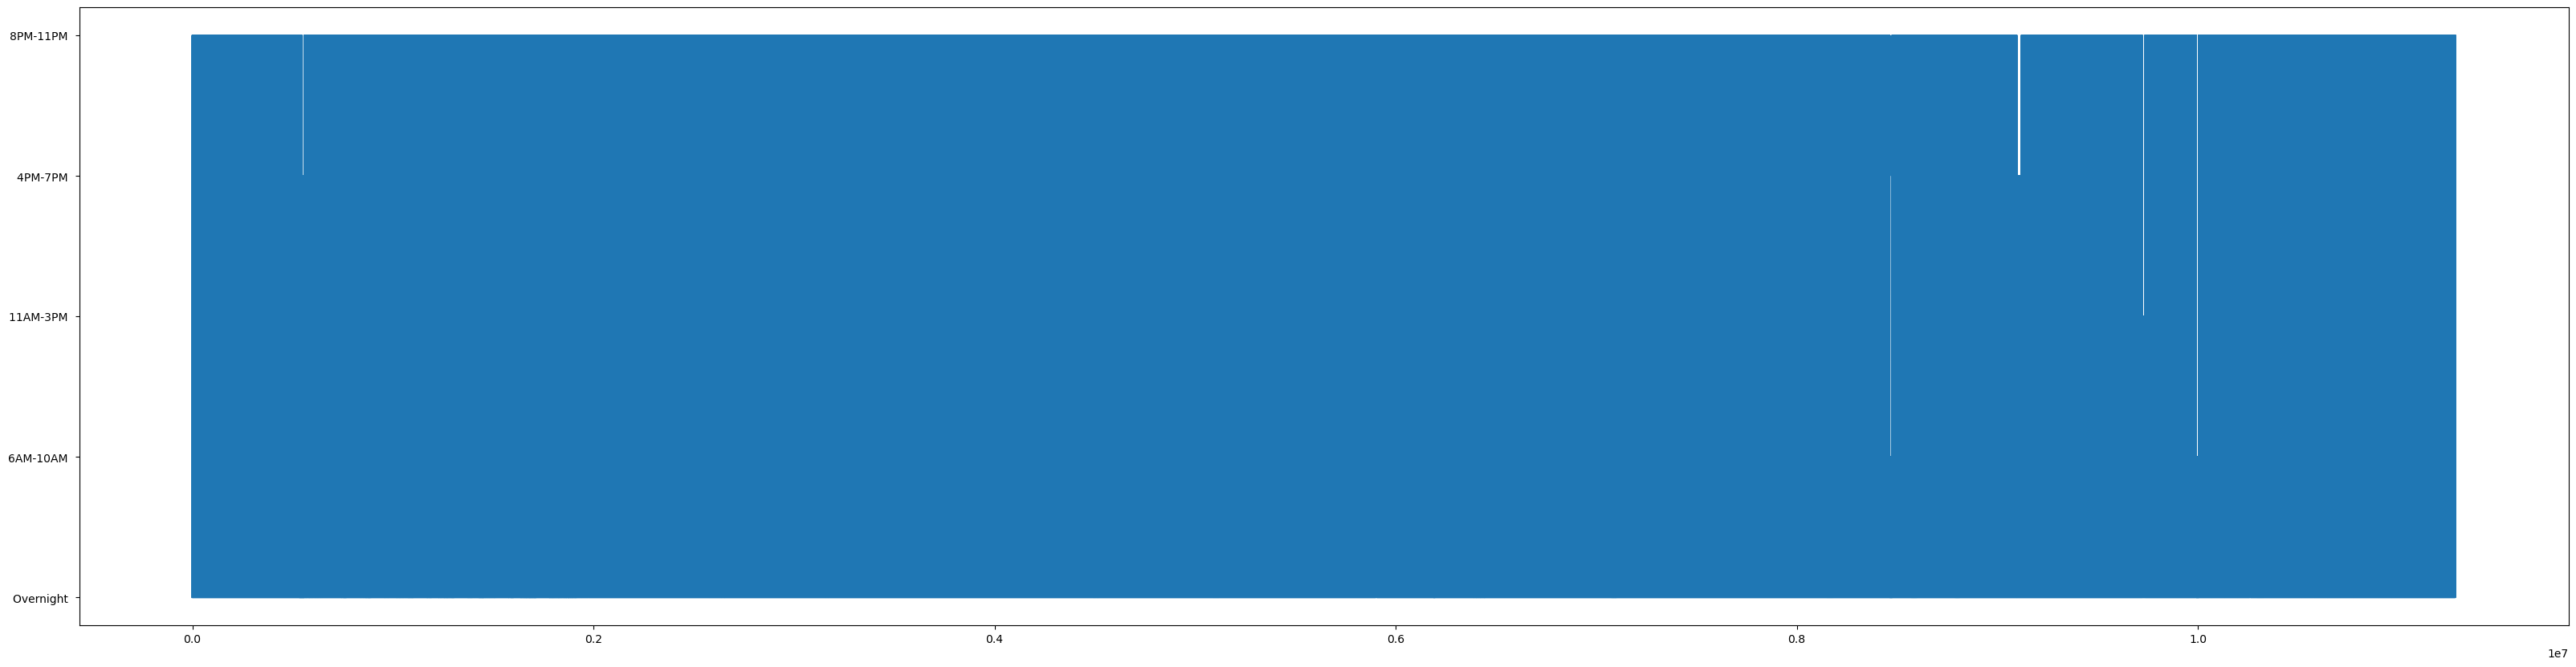

In [15]:
fig,ax = plt.subplots(1, 1, figsize=(40, 10))
ax.plot(range(0,len(data['AVAILABLE BIKES'])),data["TIME_TYPE"])
plt.show()

In [16]:
#'HANOVER QUAY' in Grand Canal Dock
#'FITZWILLIAM SQUARE EAST' in south Dublin
#'ST JAMES HOSPITAL (LUAS)'- 
# 

## can you add cluster as a column to the full data?
# maybe add 1 to each cluster - so add mater hospital to st james
# pick two on dart line & two further out?
###CHANGE station_names HERE

station_names = ['HANOVER QUAY','FITZWILLIAM SQUARE EAST', 'ST JAMES HOSPITAL (LUAS)']


In [17]:
station_names_mask = full_data['NAME'].isin(station_names)
data = full_data[station_names_mask]

In [18]:
data.sample(50)

,Unnamed: 0,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
1297811,1297811,80,2021-02-12 07:40:03,2021-02-12 07:35:27,ST JAMES HOSPITAL (LUAS),40,23,17,Open,St James Hospital (Luas),53.341358,-6.292951
7912383,2263121,68,2021-09-12 18:55:02,2021-09-12 18:51:39,HANOVER QUAY,40,28,12,Open,Hanover Quay,53.344116,-6.237153
7474125,1824863,89,2021-08-29 01:25:03,2021-08-29 01:21:05,FITZWILLIAM SQUARE EAST,40,27,13,Open,Fitzwilliam Square East,53.335213,-6.250900
6117533,468271,89,2021-07-16 01:05:03,2021-07-16 01:00:51,FITZWILLIAM SQUARE EAST,40,31,9,Open,Fitzwilliam Square East,53.335213,-6.250900
8525422,17983,68,2021-10-01 15:50:02,2021-10-01 15:49:23,HANOVER QUAY,40,26,14,Open,Hanover Quay,53.344116,-6.237153
575641,575641,68,2021-01-19 07:00:03,2021-01-19 06:56:19,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153
143323,143323,68,2021-01-05 15:35:02,2021-01-05 15:34:27,HANOVER QUAY,40,37,3,Open,Hanover Quay,53.344116,-6.237153
4450560,1685874,89,2021-05-24 12:20:02,2021-05-24 12:10:12,FITZWILLIAM SQUARE EAST,40,27,13,Open,Fitzwilliam Square East,53.335213,-6.250900
2216607,2216607,68,2021-03-15 00:55:02,2021-03-15 00:50:28,HANOVER QUAY,40,14,26,Open,Hanover Quay,53.344116,-6.237153
7373851,1724589,68,2021-08-26 21:15:02,2021-08-26 21:10:01,HANOVER QUAY,40,27,13,Open,Hanover Quay,53.344116,-6.237153


In [19]:
# write out full data to csv file

if MAKE_FILES : data.to_csv("data/station_data.csv")
#data = pd.read_csv("data/station_data.csv")


In [20]:
#df.drop(columns=["ADDRESS","LATITUDE","LONGITUDE","LAST UPDATED","NAME","STATION ID","AVAILABLE BIKE STANDS","STATUS"],axis=1,inplace=True)
#df["TIME"]=pd.to_datetime(df["TIME"])  
#df.sort_values(by=['TIME'],inplace=True)
#df["GAP AMOUNT"]=df["TIME"].diff().dt.seconds/60